2.3.1. Загрузка данных и первичный осмотр

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузить учебный датасет в pandas.DataFrame с помощью pd.read_csv (или другого подходящего метода).
Вывести:
первые строки датасета (head()),
информацию о столбцах и типах (info()),
базовые описательные статистики (describe() или аналог).

In [29]:
file = pd.read_csv('datasets/S02-hw-dataset.csv')

display(file.head(), file.info(), file.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


None

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


2.3.2. Пропуски, дубликаты и базовый контроль качества

In [122]:
a = file.isna().mean()

b = file[file.duplicated()]

c = file[(file[['age', 'purchases', 'revenue']] < 0).any(axis=1)]

d = file[file['age'] > 100]

e = file[(file['purchases'] > 0) & (file['revenue'] == 0)]

f = file[(file['country'] == int) | (file['country'] == float)]

display(a, b, c, d, e, f)

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


,user_id,age,country,purchases,revenue


Итого эти проверки дают нам понять, что в столбце 'age' содержатся данные типа "NaN", встречаются строки с аномальным(отрицательным) числом покупок, строки с аномальным(меньше нуля, больше ста) возрастом, строки с аномальным соотношением покупок и дохода, отсутствуют строки, где страна представлен в числовом формате

2.3.3. Базовый EDA: группировки, агрегаты и частоты

In [131]:
display(file['country'][file['country'] == 'RU'].value_counts()) #для одного параметра

display(file[['country', 'age']][file['country'] == 'RU'].value_counts()) #для нескольких параметров

country
RU    13
Name: count, dtype: int64

country  age 
RU       24.0    4
         31.0    2
         5.0     1
         21.0    1
         26.0    1
         34.0    1
         46.0    1
         47.0    1
         54.0    1
Name: count, dtype: int64

In [168]:
gr = file[['age', 'purchases']].groupby(['age', 'purchases'])
display(gr.size())

gr1 = file[['country', 'purchases', 'age', 'revenue']].groupby(['country']).agg('mean')
display(gr1)

age    purchases
5.0     8           1
18.0    4           1
20.0    7           1
21.0    5           1
22.0    3           1
23.0    5           1
24.0    0           1
        4           1
        5           1
        7           2
25.0    7           1
26.0    6           1
28.0    0           1
        2           1
31.0    2           1
        6           1
32.0    6           1
        11          1
33.0    6           1
34.0    7           1
35.0    3           1
        5           1
36.0    9           1
39.0    4           1
        7           1
42.0    4           1
43.0    3           1
45.0    2           1
46.0    0           1
47.0    3           1
        6           1
51.0    3           1
52.0    6           1
        7           1
54.0    6           1
55.0    1           1
57.0    7           1
120.0  -1           1
dtype: int64

,purchases,age,revenue
country,,,
CN,4.500000,24.000000,1054.000000
DE,6.500000,34.600000,1445.500000
FR,4.250000,46.250000,675.916667
RU,4.769231,30.076923,790.076923
US,4.625000,36.714286,557.375000


По первому выводу(gr) можно понять количество покупок среди людей разных возрастов
По второму выводу(gr1) можно увидеть статистику среднего количества покупок, средний возраст и среднюю выручку на основе стран, в которых происходила покупка.
Из неожиданных значений только аномальные, которые мы заметили в прошлом задании

2.4. Визуализация данных в Matplotlib

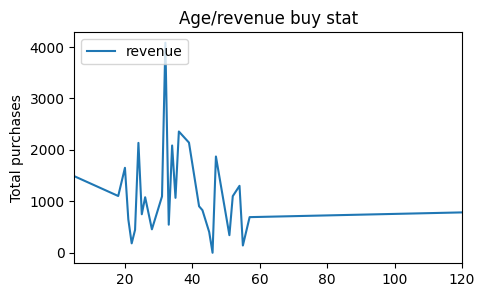

In [247]:
pivot = file.groupby('age', as_index=False)['revenue'].sum()

fix, ax = plt.subplots(figsize = (5, 3))
ax.plot(pivot['age'], pivot['revenue'], label='revenue')
ax.set_title('Age/revenue buy stat')
ax.legend(loc = 'upper left')
ax.set_ylabel('Total purchases')
ax.set_xlim(xmin=file['age'].min(), xmax=file['age'].max())
fig.tight_layout()

#fig.savefig('figures/age_revenue.png')
plt.show()

Создан линейный график соотношения возраста к сумме покупок

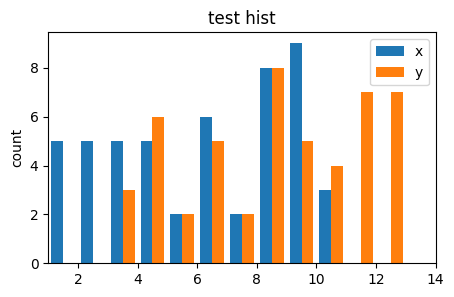

In [262]:
np.random.seed(55)
x = np.random.randint(low=1, high=11, size=50) #
y = x + np.random.randint(1, 5, size=x.size) #
data = np.column_stack((x, y))

fix, ax = plt.subplots(figsize = (5, 3))
ax.hist(data, bins = np.arange(data.min(), data.max()), label = ('x', 'y'))
ax.set_title('test hist')
ax.legend(loc = 'upper right')
ax.set_ylabel('count')
ax.set_xlim(xmin=data.min(), xmax=data.max())
fig.tight_layout()

#fig.savefig('figures/testhist.png')
plt.show()

Гистограмма данных x и y, представленная для сравнения

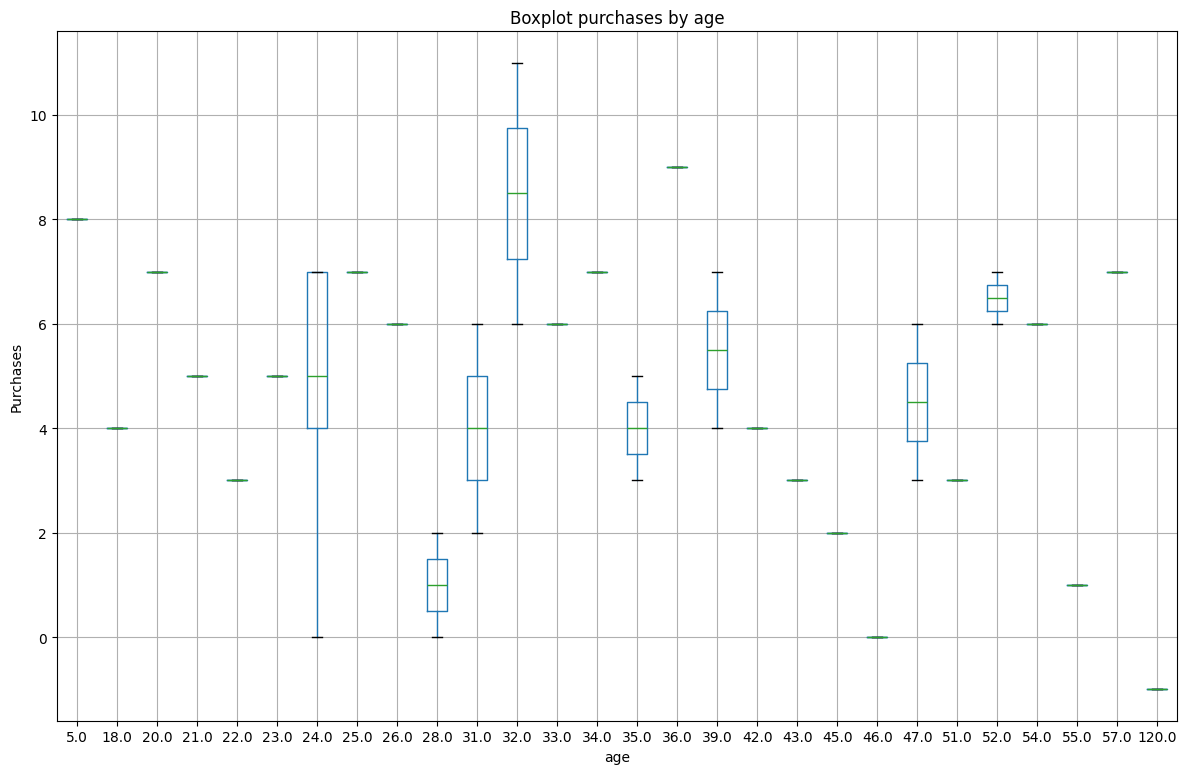

In [267]:
fig, ax = plt.subplots(figsize=(12, 8))
file.boxplot(column='purchases', by='age', ax=ax)
ax.set_title('Boxplot purchases by age')
ax.set_ylabel('Purchases')
ax.set_xlabel('age')
plt.suptitle('')  #дублирующийся заголовок
plt.tight_layout()

#fig.savefig('figures/PurchaseByAge_boxplot.png')
plt.show()


Ящики с усами количества покупок для разных возрастов

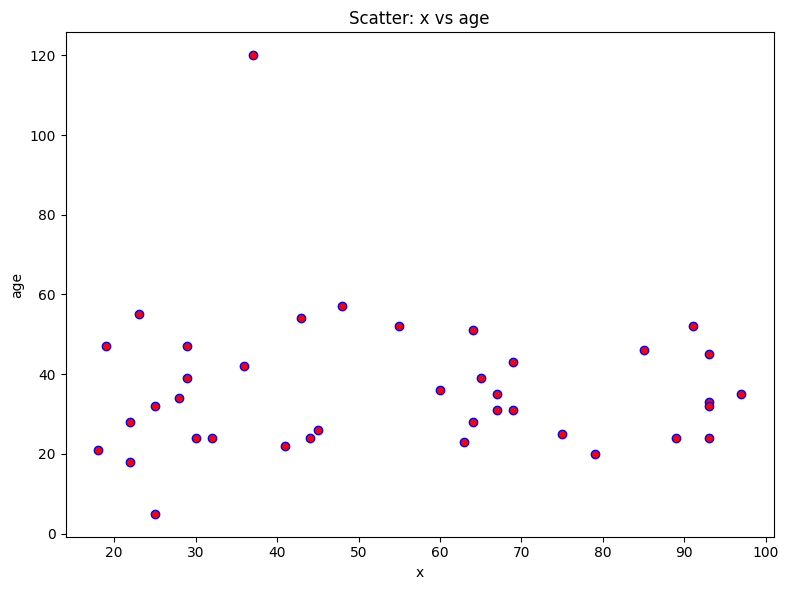

In [286]:
x = np.random.randint(low = 15, high = 100, size = 41)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, file['age'], marker = 'o', c='r', edgecolor='b')
ax.set_title('Scatter: x vs age')
ax.set_ylabel('age')
ax.set_xlabel('x')
plt.tight_layout()

#fig.savefig('figures/xVSage_scatter.png')
plt.show()

Scatter график сравнения возраста и параметра x